In [68]:
from connec_functions import execute_to_df, generate_sparql
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display, HTML

TODO: include stats on percentage we weren't able to identify

## Data system users

In [83]:
datasys_users = execute_to_df("2_data_system_users_info.sparql")
datasys_users.head()

,datasyst_user,affiliation_id,name,group,qh,country,code_2,code_3
0,http://lifewatch-user-analysis-2023/user/84dc7...,https://marineinfo.org/id/institute/36,VLIZ Flanders Marine Institute,http://lifewatch.org/ns/Research_institute,http://lifewatch.org/ns/Science,Kingdom of Belgium,BE,BEL
1,http://lifewatch-user-analysis-2023/user/2dffb...,http://lifewatch-user-analysis-2023/affiliatio...,personal,http://lifewatch.org/ns/personal_interest,http://lifewatch.org/ns/Civil_society,,,
2,http://lifewatch-user-analysis-2023/user/ef667...,https://marineinfo.org/id/institute/5443,INBO Research Institute for Nature and Forest,http://lifewatch.org/ns/Research_institute,http://lifewatch.org/ns/Science,Kingdom of Belgium,BE,BEL
3,http://lifewatch-user-analysis-2023/user/8689d...,https://marineinfo.org/id/institute/5443,INBO Research Institute for Nature and Forest,http://lifewatch.org/ns/Research_institute,http://lifewatch.org/ns/Science,Kingdom of Belgium,BE,BEL
4,http://lifewatch-user-analysis-2023/user/bce98...,https://marineinfo.org/id/institute/36,VLIZ Flanders Marine Institute,http://lifewatch.org/ns/Research_institute,http://lifewatch.org/ns/Science,Kingdom of Belgium,BE,BEL


In [85]:
datasys_users.groupby("datasyst_user").nunique() #issue of uuids!!!

,affiliation_id,name,group,qh,country,code_2,code_3
datasyst_user,,,,,,,
http://lifewatch-user-analysis-2023/user/00192218-4da5-4dcd-a8b1-0d0507988d42,1,1,1,1,1,1,1
http://lifewatch-user-analysis-2023/user/002a05a7-2986-4064-b3f2-2b3b251bb45b,1,1,1,1,1,1,1
http://lifewatch-user-analysis-2023/user/0036c16f-d930-4da2-9413-66df1bd77a65,1,1,1,1,1,1,1
http://lifewatch-user-analysis-2023/user/00375ca2-f0b1-4246-ac36-bafac6f471c7,0,0,0,0,0,0,0
http://lifewatch-user-analysis-2023/user/006a7a30-13cc-4a4d-8cdc-2395f4cb0153,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
http://lifewatch-user-analysis-2023/user/ffcb9a71-e27f-45f2-ab44-f32e8ed2e533,1,1,1,1,1,1,1
http://lifewatch-user-analysis-2023/user/ffe9876a-0449-4bc3-bfb8-6c4f15002240,1,1,1,1,1,1,1
http://lifewatch-user-analysis-2023/user/ffead78a-cc12-4459-8c65-e81e7c8aeca7,1,1,1,1,1,1,1


In [89]:
datasys_users.groupby("datasyst_user").nunique().sum()

affiliation_id    2696
name              2773
group             2700
qh                2695
country           2705
code_2            2705
code_3            2705
dtype: int64

In [71]:
# data system user for which no affiliation could be identified 
datasys_users.isnull().sum()

datasyst_user       0
affiliation_id    654
name              655
group             655
qh                655
country           655
code_2            655
code_3            655
dtype: int64

In [72]:
# drop na values
datasys_users.dropna(inplace=True)

In [73]:
# affiliations
datasys_users.groupby("affiliation_id").describe()

datasyst_user         \
                                                           count unique   
affiliation_id                                                            
http://lifewatch-user-analysis-2023/affiliation...             1      1   
http://lifewatch-user-analysis-2023/affiliation...             1      1   
http://lifewatch-user-analysis-2023/affiliation...             1      1   
http://lifewatch-user-analysis-2023/affiliation...             1      1   
http://lifewatch-user-analysis-2023/affiliation...             1      1   
...                                                          ...    ...   
https://ror.org/05p8w6387                                      1      1   
https://ror.org/05pcv4v03                                      1      1   
https://ror.org/05pnwvj86                                      6      6   
https://ror.org/05qt8tf94                                      1      1   
https://ror.org/05y503v71                                      4      4   

                                                                                                       \
                                                                                                  top   
affiliation_id                                                                                          
http://lifewatch-user-analysis-2023/affiliation...  http://lifewatch-user-analysis-2023/user/224b5...   
http://lifewatch-user-analysis-2023/affiliation...  http://lifewatch-user-analysis-2023/user/4e144...   
http://lifewatch-user-analysis-2023/affiliation...  http://lifewatch-user-analysis-2023/user/3fbd0...   
http://lifewatch-user-analysis-2023/affiliation...  http://lifewatch-user-analysis-2023/user/3598d...   
http://lifewatch-user-analysis-2023/affiliation...  http://lifewatch-user-analysis-2023/user/8eab0...   
...                                                                                               ...   
https://ror.org/05p8w6387                           http://lifewatch-user-analysis-2023/user/09772...   
https://ror.org/05pcv4v03                           http://lifewatch-user-analysis-2023/user/08fc0...   
https://ror.org/05pnwvj86                           http://lifewatch-user-analysis-2023/user/a1b07...   
https://ror.org/05qt8tf94                           http://lifewatch-user-analysis-2023/user/ed18a...   
https://ror.org/05y503v71                           http://lifewatch-user-analysis-2023/user/40ddc...   

                                                         name         \
                                                   freq count unique   
affiliation_id                                                         
http://lifewatch-user-analysis-2023/affiliation...    1     1      1   
http://lifewatch-user-analysis-2023/affiliation...    1     1      1   
http://lifewatch-user-analysis-2023/affiliation...    1     1      1   
http://lifewatch-user-analysis-2023/affiliation...    1     1      1   
http://lifewatch-user-analysis-2023/affiliation...    1     1      1   
...                                                 ...   ...    ...   
https://ror.org/05p8w6387                             1     1      1   
https://ror.org/05pcv4v03                             1     1      1   
https://ror.org/05pnwvj86                             1     6      1   
https://ror.org/05qt8tf94                             1     1      1   
https://ror.org/05y503v71                             1     4      1   

                                                                                                       \
                                                                                                  top   
affiliation_id                                                                                          
http://lifewatch-user-analysis-2023/affiliation...             Centre for Biodiversity Genomics (CBG)   
http://lifewatch-user-analysis-2023/affiliation...                                   OSPAR commissio

In [74]:
marineinfo_affils = datasys_users[datasys_users["affiliation_id"].str.contains("https://marineinfo.org/id/institute/")]
marineinfo_affils.groupby("affiliation_id").nunique().sum()

datasyst_user    1411
name              426
group             402
qh                401
country           403
code_2            403
code_3            403
dtype: int64

In [75]:
ror_affils = datasys_users[datasys_users["affiliation_id"].str.contains("https://ror.org/")]
ror_affils.groupby("affiliation_id").nunique().sum()

datasyst_user    204
name             131
group            127
qh               126
country          126
code_2           126
code_3           126
dtype: int64

In [76]:
other_affils = datasys_users[datasys_users["affiliation_id"].str.contains("/affiliation/")]
other_affils.groupby("affiliation_id").nunique().sum()

datasyst_user    1080
name              176
group             176
qh                176
country           176
code_2            176
code_3            176
dtype: int64

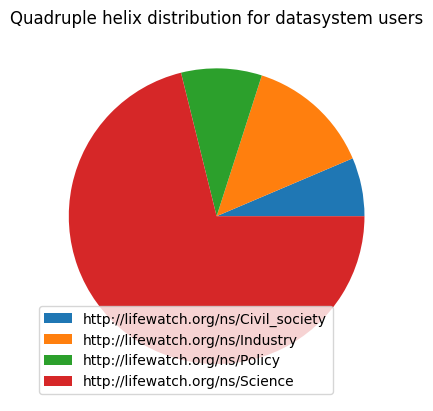

In [77]:
# distribution of Quadruple Helix
datasys_users_qh = datasys_users.groupby(['qh']).nunique()

plt.pie(datasys_users_qh['affiliation_id'])
plt.legend(labels=datasys_users_qh.index)
plt.title("Quadruple helix distribution for datasystem users")
plt.show()

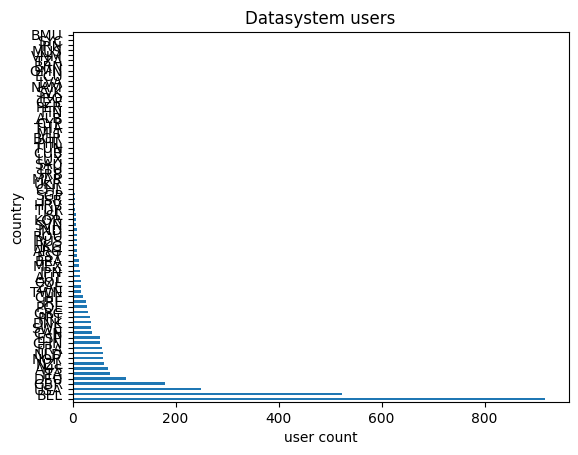

In [78]:
# horizontal barplot of affiliation country count, from datasystem users
dsusers_per_country_fig = datasys_users['code_3'].value_counts().plot.barh(title = "Datasystem users",ylabel="country", xlabel="user count")

In [79]:
# table of unique datasystem users grouped per type of affiliation and quadruple helix group  
datasys_users.groupby(['qh','group']).nunique()

datasyst_user  \
qh                                    group                                                             
http://lifewatch.org/ns/Civil_society http://lifewatch.org/ns/Creative_body                         5   
                                      http://lifewatch.org/ns/Educational_school                    2   
                                      http://lifewatch.org/ns/NGO                                   4   
                                      http://lifewatch.org/ns/Non-profit_organization              36   
                                      http://lifewatch.org/ns/Other                                19   
                                      http://lifewatch.org/ns/personal_interest                   861   
http://lifewatch.org/ns/Industry      http://lifewatch.org/ns/Company                              78   
                                      http://lifewatch.org/ns/Consultancy                          44   
                                      http://lifewatch.org/ns/Research_institute                    1   
http://lifewatch.org/ns/Policy        http://lifewatch.org/ns/Defence                               5   
                                      http://lifewatch.org/ns/EU_institution                        8   
                                      http://lifewatch.org/ns/Governmental_body                    91   
                                      http://lifewatch.org/ns/Intergovernmental_body                3   
                                      http://lifewatch.org/ns/Non-profit_organization               1   
                                      http://lifewatch.org/ns/Other_public_authorities              5   
http://lifewatch.org/ns/Science       http://lifewatch.org/ns/Company                               1   
                                      http://lifewatch.org/ns/Data_infrastructure                  44   
                                      http://lifewatch.org/ns/International_programme              16   
                                      http://lifewatch.org/ns/Museum                              148   
                                      http://lifewatch.org/ns/Research_                             4   
                                      http://lifewatch.org/ns/Research_Institute                    3   
                                      http://lifewatch.org/ns/Research_institute                  655   
                                      http://lifewatch.org/ns/Research_network                      1   
                                      http://lifewatch.org/ns/Scientific_journal                    1   
                                      http://lifewatch.org/ns/University                          666   

                                                                                        affiliation_id  \
qh                                    group                                                              
http://lifewatch.org/ns/Civil_society http://lifewatch.org/ns/Creative_body                          5   
                                      http://lifewatch.org/ns/Educational_school                     2   
                                      http://lifewatch.org/ns/NGO                                    3   
                                      http://lifewatch.org/ns/Non-profit_organization               20   
                                      http://lifewatch.org/ns/Other                                 14   
                                      http://lifewatch.org/ns/personal_interest                      1   
http://lifewatch.org/ns/Industry      http://lifewatch.org/ns/Company                               63   
                                      http://lifewatch.org/ns/Consultancy                           33   
                                      http://lifewatch.org/ns/Research_institute                     1   
http://lifewatch.org/ns/Policy        http://lifewatch.org/ns/Defence                 